# Homework 4: Spectrogram
by Rustam Guseyn-zade ([link canvas](https://skoltech.instructure.com/courses/3546/users/9673))

## Table of contents
* [Signal with 4th wave packet](#Adding-4th-wave-packet-to-the-signal)
* [Spectogram](#Spectogram)
* [Measure timings](#Measure-timings)

In [1]:
# import needed libraries
import numpy as np
import math
import matplotlib.pyplot as plt
import time

## Adding 4th wave packet to the signal

In [2]:
def signal(t):
    y=np.sin(t)*np.exp(-t**2/2/20**2)
    y=y+np.sin(3*t)*np.exp(-(t-5*2*math.pi)**2/2/20**2)
    y=y+np.sin(5.5*t)*np.exp(-(t-10*2*math.pi)**2/2/5**2)
    y=y+np.sin(4*t)*np.exp(-(t-7*2*math.pi)**2/2/5**2)
    return y

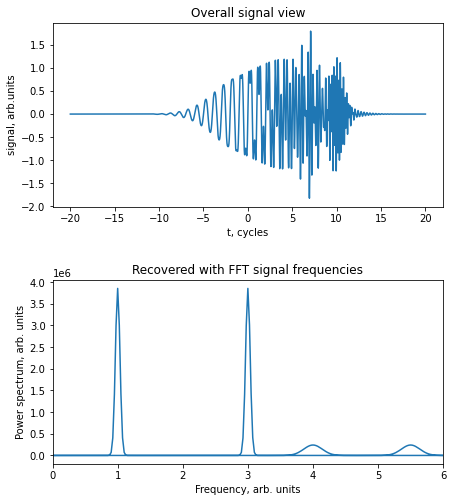

In [3]:
# generate the signal
t=np.linspace(-20*2*math.pi, 20*2*math.pi, 3**9+6)
y=signal(t)

fig, ax = plt.subplots(2, figsize=(7,7))


ax[0].set_xlabel('t, cycles')
ax[0].set_ylabel('signal, arb.units')
ax[0].title.set_text('Overall signal view')
ax[0].plot(t/2/math.pi,y)


sp=np.fft.fft(y)
w=np.fft.fftfreq(len(y), d=(t[1]-t[0])/2/math.pi)

ax[1].plot(w, abs(sp)**2)
ax[1].set_xlim(0, 6)
ax[1].set_xlabel('Frequency, arb. units')
ax[1].set_ylabel('Power spectrum, arb. units')
ax[1].title.set_text('Recovered with FFT signal frequencies')


plt.subplots_adjust(top=1.0, wspace=0.4, hspace=0.4)

## Spectogram

In [4]:
def spectrogram(nwindowsteps=1000, steps_in_t = 3**9+6):
    t = np.linspace(-20*2*math.pi, 20*2*math.pi, steps_in_t)
    y = signal(t)
    
    window_positions= np.linspace(-20*2*math.pi, 20*2*math.pi, nwindowsteps)
    window_width = 2.0*2*math.pi
    
    specgram = np.empty([len(t), len(window_positions)])
    
    for i in range(len(window_positions)):
        window_position = window_positions[i]
        window_funtion = np.exp(-(t-window_position)**2/2/window_width**2)
        y_window = y * window_funtion
        specgram[:,i] = abs(np.fft.fft(y_window))
    return specgram

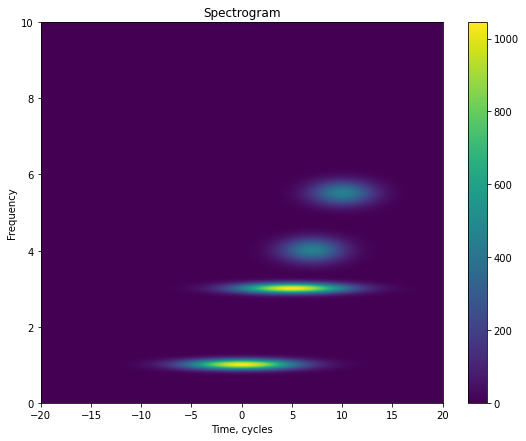

In [5]:
fig, ax = plt.subplots()
ax.set_ylim(0, 10)
im = ax.imshow(spectrogram(nwindowsteps = 10000), aspect='auto', origin='lower', extent=[min(t)/2/math.pi, max(t)/2/math.pi, y[0], 2 * w[int(len(w)/2)-1]])
fig.set_size_inches(9, 7, forward=True)
fig.colorbar(im, ax=ax)
ax.set_xlabel('Time, cycles')
ax.set_ylabel('Frequency')
ax.title.set_text('Spectrogram')
plt.show()

## Measure timings

In [6]:
def time_of_building_spectrogram(steps_in_t):
    start = time.time()
    spectrogram(steps_in_t = steps_in_t)
    end = time.time()
    return (end - start) * 1000

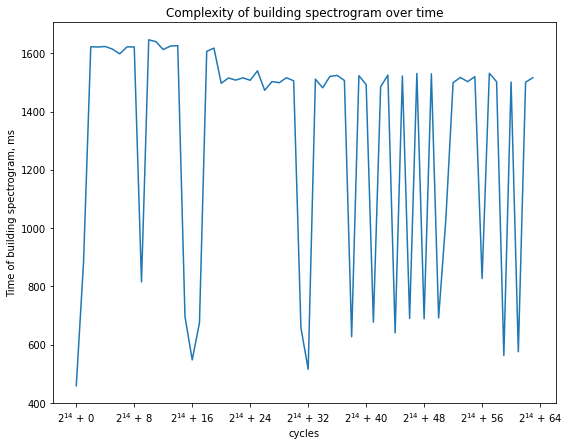

In [7]:
initial_steps = 2**14
range_size = 64
time_for_spectrogram = [time_of_building_spectrogram(initial_steps+i) for i in range(range_size)]

fig, ax = plt.subplots()
ax.plot(time_for_spectrogram)

x_locs = np.linspace(0, range_size, 9)
ax.set_xticks(x_locs)
ax.set_xticklabels([r"$2^{14}$ + " + str(int(i)) for i in x_locs])

fig.set_size_inches(9, 7, forward=True)
ax.set_xlabel('cycles')
ax.set_ylabel('Time of building spectrogram, ms')
ax.title.set_text('Complexity of building spectrogram over time')

As we can see from the graph, the least time spectrogram takes to build, when time number of cycles could be devided by some power of two . Probably that's because of `np.fft.fft` function implementation or cache misses